<a href="https://www.kaggle.com/code/kaixiongf/derby-competition-2022-eda-phase?scriptVersionId=103809701" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-data-derby-2022/nyra_tracking_table.csv
/kaggle/input/big-data-derby-2022/nyra_start_table.csv
/kaggle/input/big-data-derby-2022/nyra_race_table.csv
/kaggle/input/big-data-derby-2022/nyra_2019_complete.csv


# **1. Introduction**

Injury prevention is a critical component in modern athletics. Sports that involve animals, such as horse racing, are no different than human sport. Typically, efficiency in movement correlates to both improvements in performance and injury prevention.

A wealth of data is now collected, including measures for heart rate, EKG, longitudinal movement, dorsal/ventral movement, medial/lateral deviation, total power and total landing vibration. Your data science skills and analysis are needed to decipher what makes the most positive impact.

In this competition, you will create a model to interpret one aspect of this new data. You’ll be among the first to access X/Y coordinate mapping of horses during races. Using the data, you might analyze jockey decision making, compare race surfaces, or measure the relative importance of drafting. With considerable data, contestants can flex their creativity problem solving skills.

Data for year 2019

#### **Goals**

Your challenge is to generate actionable, practical, and novel insights from horse tracking data that devises innovative and data-driven approaches to analyzing racing tactics, drafting strategies and path efficiency. There are several potential topics for participants to analyze.

These include, but are not limited to:

* Create a horse rating measuring expected finish position versus actual finish position. How does a horse’s expected finish position change through the running of a race? Does this metric rely solely on a horse’s own position or is it influenced by the position of competitors?
* What are optimal racing strategies? Considering different venues, surfaces and race distances. Create a jockey rating based upon path efficiency?
* Create a surface measure model which would rate the fairness of different paths on a racecourse that may be beneficial or harmful to finish position based. This may be a result of unknown barometric, weather or maintenance factors.
* Create a model measuring the existence (or not) and relevance of a drafting benefit.
* Create a model reveal optimal gait patterns. Does the model differ for such factors as age, distance, race section or surface?

**WOULD APPRECIATE IF YOU COULD LEAVE AN UPVOTE! :)**

#### Establishing Environment

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Understanding the Shape of Data**

In [3]:
derby_df = pd.read_csv("../input/big-data-derby-2022/nyra_2019_complete.csv")
derby_df['race_date']= pd.to_datetime(derby_df['race_date'],format='%Y-%m-%d')
derby_df['month']= derby_df['race_date'].dt.month
derby_df['day']= derby_df['race_date'].dt.day

derby_df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,month,day
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,1,1
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,1,1
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,1,1
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,1,1
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090,1,1


In [4]:
derby_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 19 columns):
 #   Column           Dtype         
---  ------           -----         
 0   track_id         object        
 1   race_date        datetime64[ns]
 2   race_number      int64         
 3   program_number   object        
 4   trakus_index     int64         
 5   latitude         float64       
 6   longitude        float64       
 7   distance_id      int64         
 8   course_type      object        
 9   track_condition  object        
 10  run_up_distance  int64         
 11  race_type        object        
 12  purse            int64         
 13  post_time        int64         
 14  weight_carried   int64         
 15  jockey           object        
 16  odds             int64         
 17  month            int64         
 18  day              int64         
dtypes: datetime64[ns](1), float64(2), int64(10), object(6)
memory usage: 757.9+ MB


In [5]:
derby_df.describe()

,race_number,trakus_index,latitude,longitude,distance_id,run_up_distance,purse,post_time,weight_carried,odds,month,day
count,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06
mean,5.505409e+00,1.838652e+02,4.120387e+01,-7.377702e+01,7.563151e+02,6.791919e+01,8.887891e+04,4.204248e+02,1.207133e+02,1.482920e+03,7.011349e+00,1.560252e+01
std,2.860656e+00,1.183327e+02,9.771227e-01,4.711054e-02,1.796887e+02,3.892271e+01,1.278240e+05,2.802545e+02,4.351881e+00,1.952415e+03,3.214553e+00,8.751784e+00
min,1.000000e+00,1.000000e+00,4.066671e+01,-7.383260e+01,4.500000e+02,0.000000e+00,1.600000e+04,1.000000e+02,1.100000e+02,0.000000e+00,1.000000e+00,1.000000e+00
25%,3.000000e+00,8.800000e+01,4.067346e+01,-7.382883e+01,6.000000e+02,4.500000e+01,4.100000e+04,2.330000e+02,1.180000e+02,3.350000e+02,5.000000e+00,8.000000e+00
50%,6.000000e+00,1.760000e+02,4.071393e+01,-7.376915e+01,8.000000e+02,5.400000e+01,6.200000e+04,3.490000e+02,1.200000e+02,7.300000e+02,7.000000e+00,1.500000e+01
75%,8.000000e+00,2.640000e+02,4.071739e+01,-7.372564e+01,8.500000e+02,8.000000e+01,8.000000e+04,5.160000e+02,1.220000e+02,1.740000e+03,1.000000e+01,2.300000e+01
max,1.300000e+01,1.062000e+03,4.307399e+01,-7.371483e+01,2.000000e+03,2.800000e+02,1.500000e+06,1.259000e+03,1.600000e+02,1.910000e+04,1.200000e+01,3.100000e+01


In [6]:
derby_df.isna().sum()

track_id           0
race_date          0
race_number        0
program_number     0
trakus_index       0
latitude           0
longitude          0
distance_id        0
course_type        0
track_condition    0
run_up_distance    0
race_type          0
purse              0
post_time          0
weight_carried     0
jockey             0
odds               0
month              0
day                0
dtype: int64

# **3. Data Cleaning and Exploration**

## **3.1 Basic Exploration**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


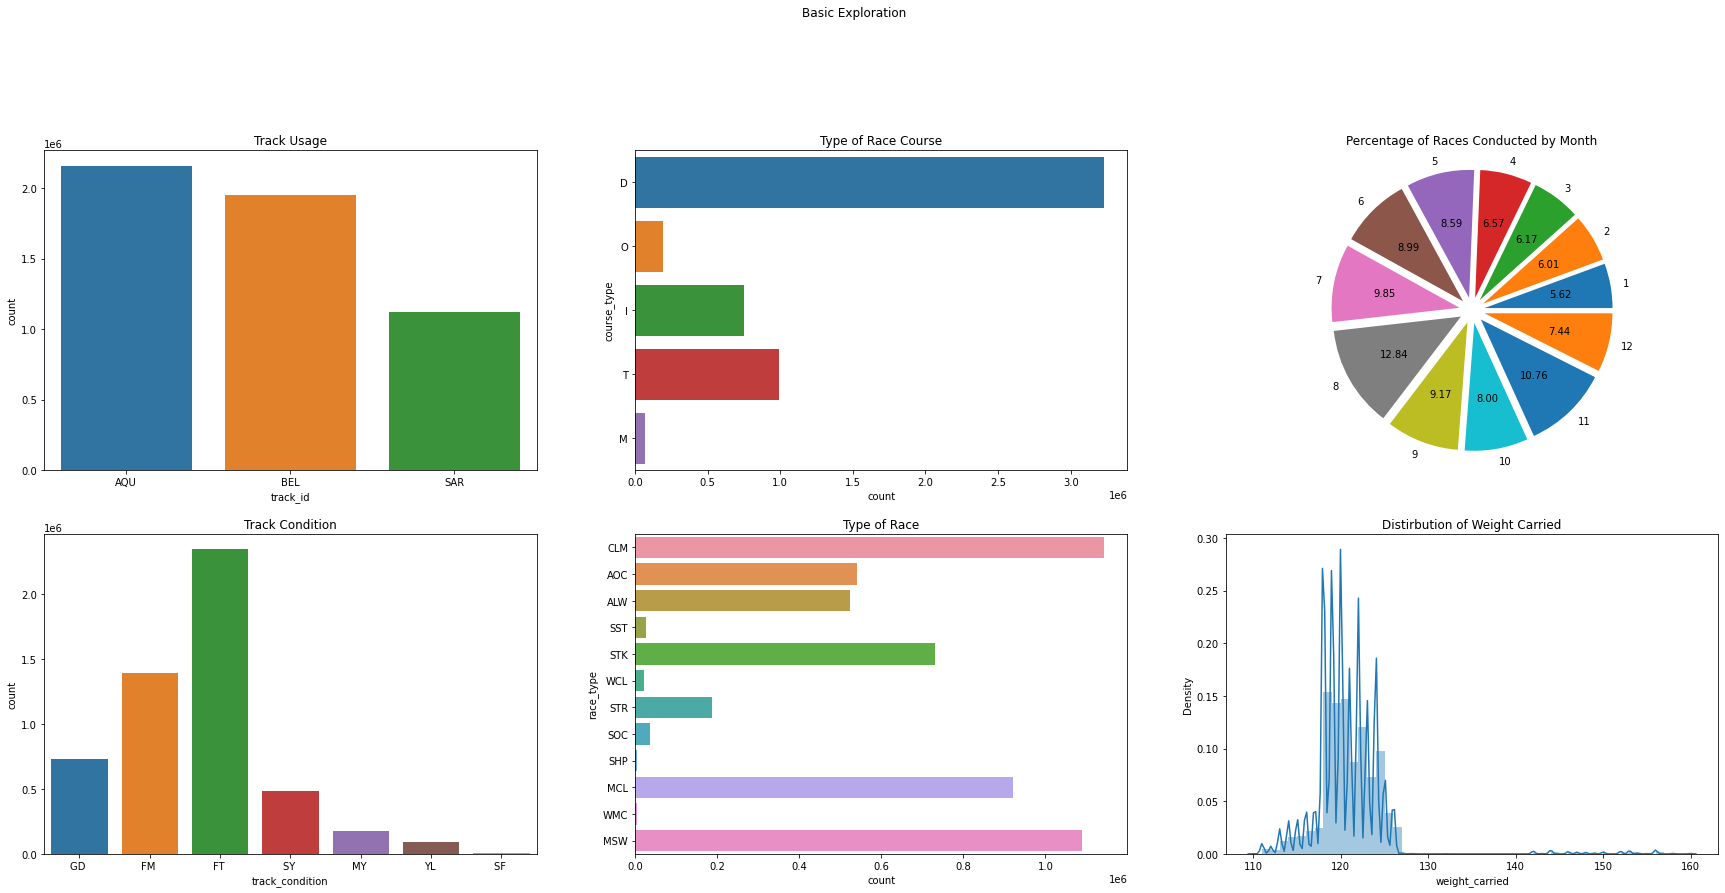

In [7]:
fig = plt.figure(figsize = (30,20))
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

sns.countplot(x=derby_df["track_id"],ax=ax1)
ax1.set_title("Track Usage")

sns.countplot(y=derby_df["course_type"],ax=ax2)
ax2.set_title("Type of Race Course")

derby_month_gb = derby_df.groupby("month")
monthly_race_number=derby_month_gb["race_number"].count()
total_race_number=derby_df["race_number"].count()
percentage_race_number=monthly_race_number/total_race_number
labels = list(derby_month_gb.groups)
# months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
ax3.pie(percentage_race_number,labels=labels, autopct='%.2f',
        explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
ax3.set_title("Percentage of Races Conducted by Month")

sns.countplot(x=derby_df["track_condition"],ax=ax4)
ax4.set_title("Track Condition")

sns.countplot(y=derby_df["race_type"],ax=ax5)
ax5.set_title("Type of Race")

sns.distplot(derby_df["weight_carried"],ax=ax6)
ax6.set_title("Distirbution of Weight Carried")

fig.suptitle("Basic Exploration")
plt.tight_layout
plt.show()

* Can consder grouping instead of months, by seasons
* Subsample required? Conditions very skewed (Track used, track condition, type of course, type of race)

<AxesSubplot:xlabel='race_number', ylabel='count'>

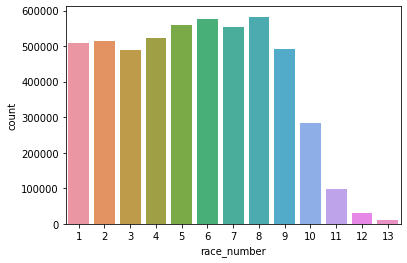

In [8]:
# Number of races
race_bar = sns.countplot(x=derby_df["race_number"])
race_bar

In [9]:
derby_df1 = derby_df.copy()

## **3.2 Track AQU**

In [10]:
cond1 = derby_df1["track_id"] == "AQU"
derby_df1_AQU = derby_df1[cond1]
derby_df1_AQU.head()
derby_df1_AQU["track_id"].unique()

array(['AQU'], dtype=object)

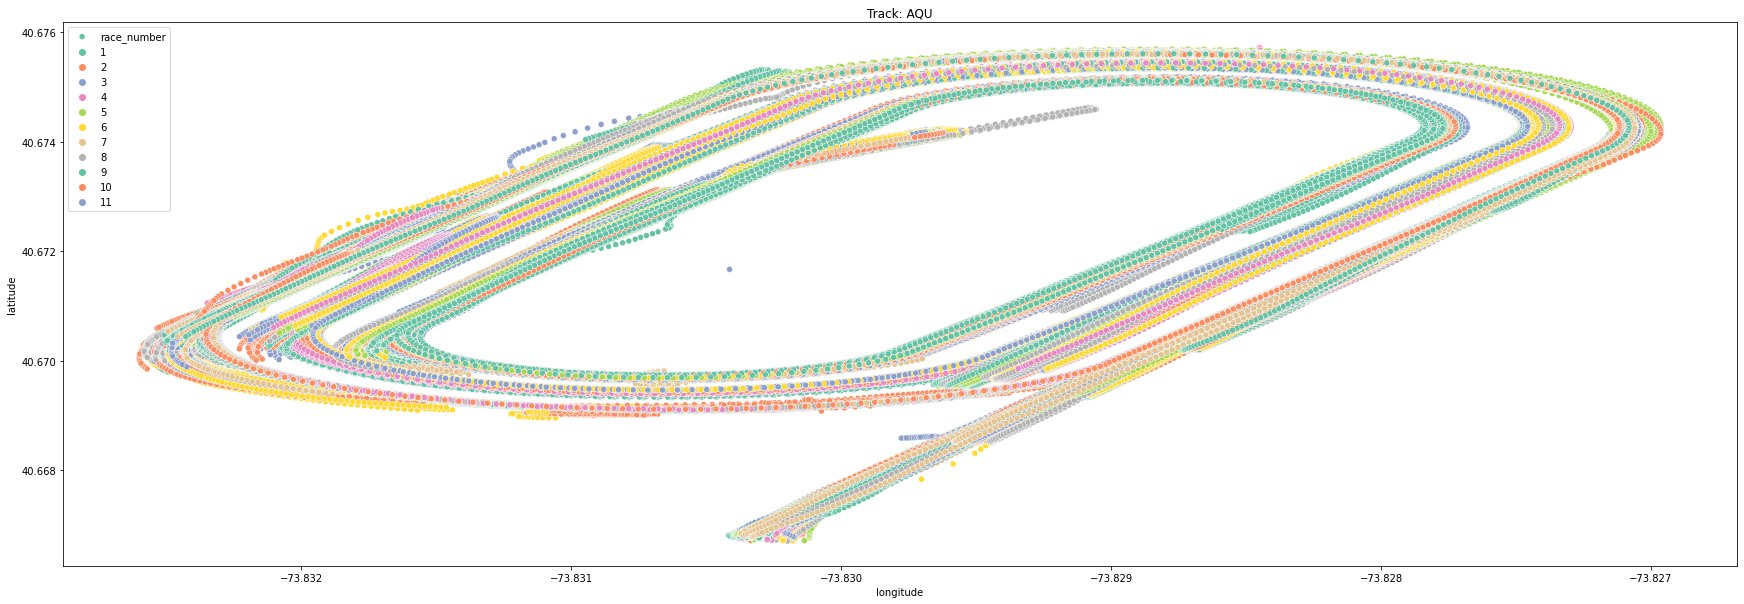

In [11]:
fig=plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(111)
sns.scatterplot(data=derby_df1_AQU,x = "longitude", y = "latitude", hue = "race_number",label = "race_number", palette = "Set2")
ax1.set_title("Track: AQU")
plt.legend()

## **3.3 Track BEL**

In [12]:
cond1 = derby_df1["track_id"] == "BEL"
derby_df1_BEL = derby_df1[cond1]
derby_df1_BEL.head()
derby_df1_BEL["track_id"].unique()

array(['BEL'], dtype=object)

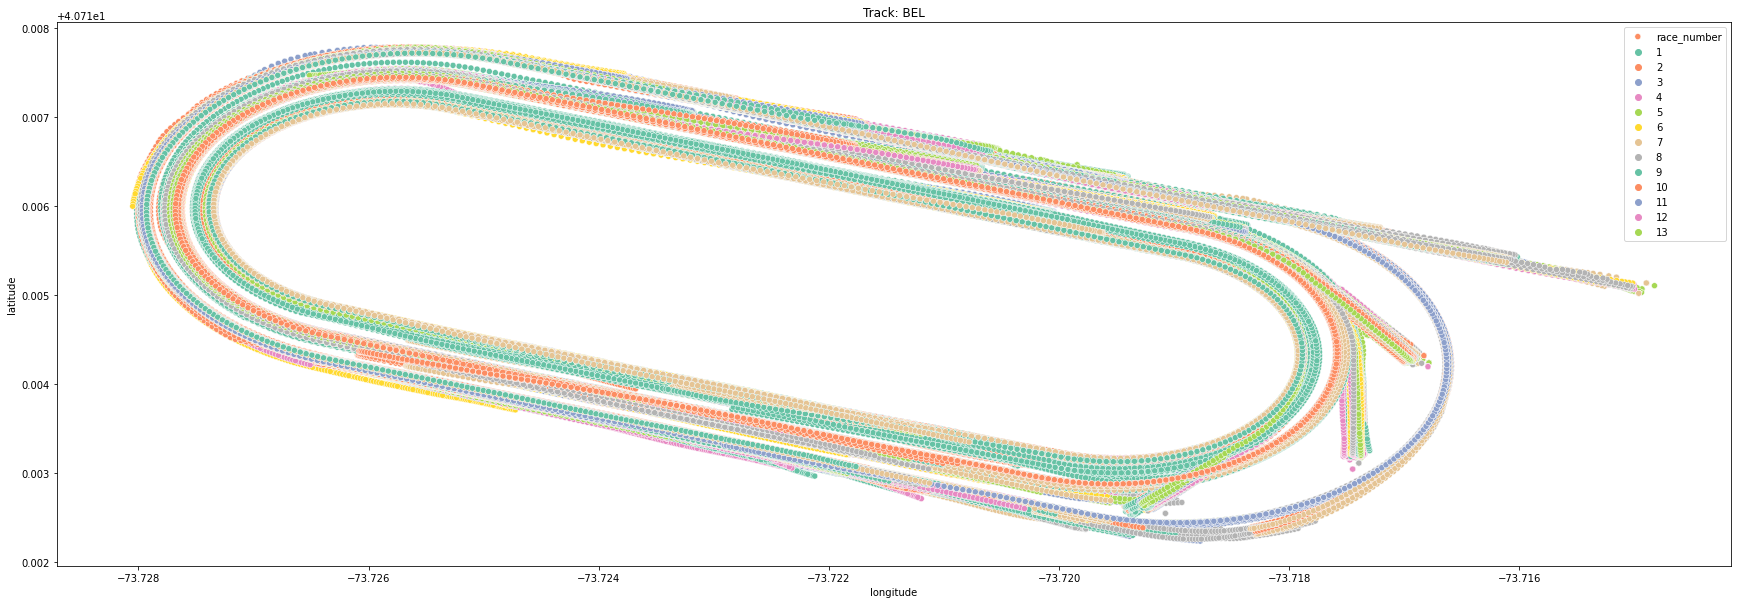

In [13]:
fig=plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(111)
sns.scatterplot(data=derby_df1_BEL,x = "longitude", y = "latitude", hue = "race_number",label = "race_number", palette = "Set2")
ax1.set_title("Track: BEL")
plt.legend()

## **3.3 Track SAR**



In [14]:
cond1 = derby_df1["track_id"] == "SAR"
derby_df1_SAR = derby_df1[cond1]
derby_df1_SAR.head()
derby_df1_SAR["track_id"].unique()

array(['SAR'], dtype=object)

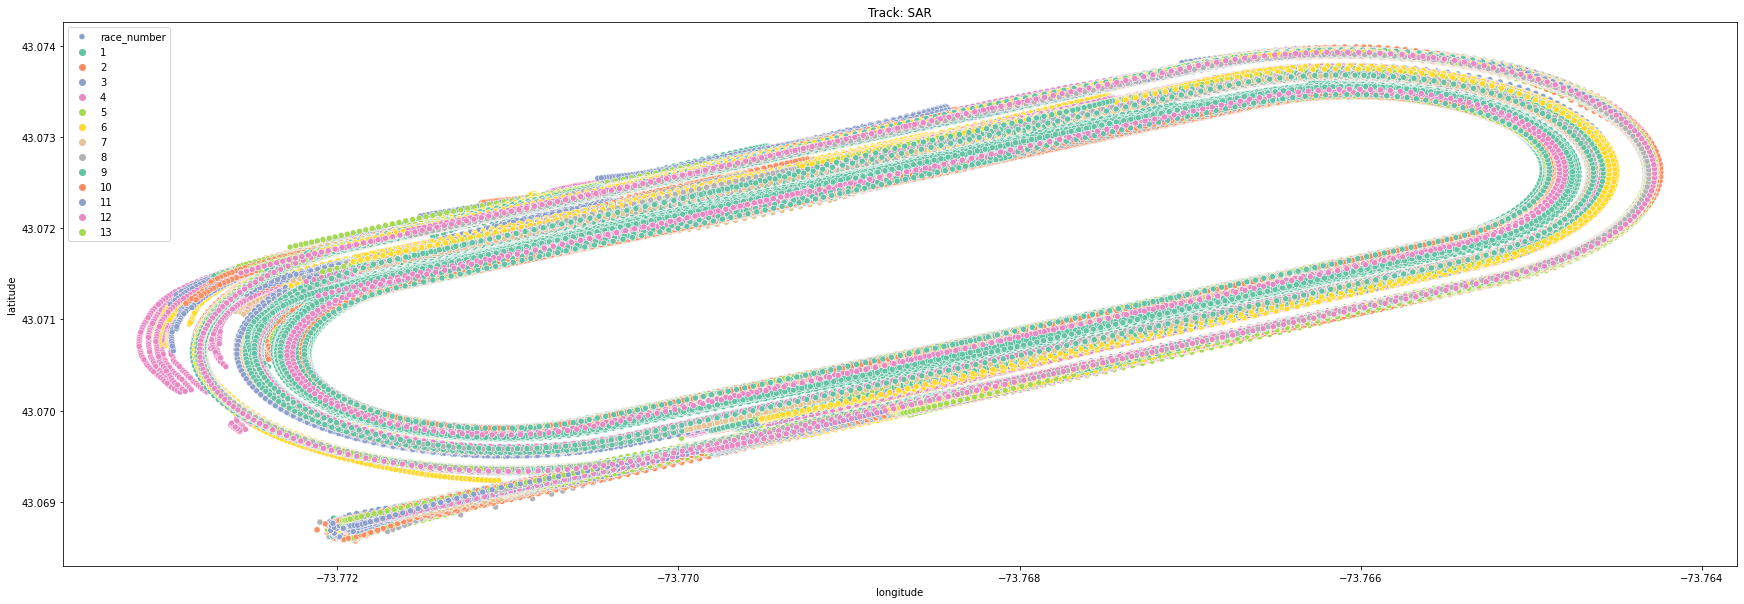

In [15]:
fig=plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(111)
sns.scatterplot(data=derby_df1_SAR,x = "longitude", y = "latitude", hue = "race_number",label = "race_number", palette = "Set2")
ax1.set_title("Track: SAR")
plt.legend()

## **3.4 Correlation Matrix**

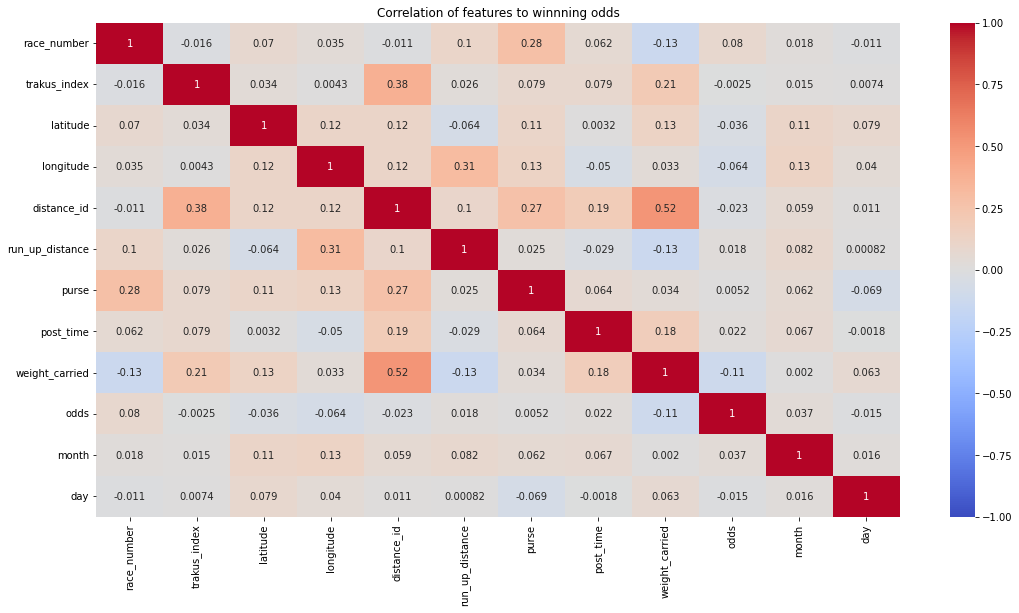

In [16]:
fig = plt.figure(figsize = (18,20))
ax1 = fig.add_subplot(211)

sns.heatmap(derby_df1.corr(),cmap = "coolwarm",vmin = -1, vmax = 1,annot=True)
ax1.set_title("Correlation of features to winnning odds")

plt.tight_layout
plt.show()